# 使用kNN算法改进约会网站的配对效果

## 1 准备数据：提供文本文件（直接用书本提供的数据集）

## 2 准备数据：使用Python解析文本文件

In [2]:
# 文本记录转换为numpy的解析程序
import os
import numpy as np

filename = os.path.join(os.path.abspath(os.curdir), 'datingTestSet2.txt')
with open(filename) as fr:
    arrayOlines = fr.readlines()


In [3]:
numberOfLines = len(arrayOlines)    # 文件行数
numberOfLines

1000

In [4]:
# 创建返回的Numpy矩阵
# 文件行数就是样本数
# 每个样本有3种特征：每年获得的飞行常客里程数，玩视频游戏所耗时间百分比，每周消费的冰淇淋公升数
return_mat = np.zeros((numberOfLines, 3)) 
return_mat

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [20]:
class_label_vector = []
index = 0

# 解析文件数据到列表
for line in arrayOlines:
    line = line.strip()     # 去除每一行前后的空格
    list_from_line = line.split('\t')
    return_mat[index] = list_from_line[0:3]
    # 逗号以及后边的冒号应该可以省略
    # return_mat[index,:] = list_from_line[0:3]
    class_label_vector.append(int(list_from_line[-1]))
    index += 1

In [21]:
return_mat

array([[  4.09200000e+04,   8.32697600e+00,   9.53952000e-01],
       [  1.44880000e+04,   7.15346900e+00,   1.67390400e+00],
       [  2.60520000e+04,   1.44187100e+00,   8.05124000e-01],
       ..., 
       [  2.65750000e+04,   1.06501020e+01,   8.66627000e-01],
       [  4.81110000e+04,   9.13452800e+00,   7.28045000e-01],
       [  4.37570000e+04,   7.88260100e+00,   1.33244600e+00]])

In [30]:
class_label_vector[0:20]

[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3]

## 3 分析数据：使用Matplotlib画二维扩散图

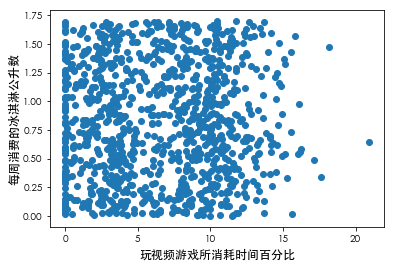

In [47]:
import matplotlib
import matplotlib.pyplot as plt
# 可以显示中文
matplotlib.rcParams['font.sans-serif']=['STHeiti','sans-serif']

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(return_mat[:,1], return_mat[:,2])
plt.xlabel('玩视频游戏所消耗时间百分比',fontsize='large')
plt.ylabel('每周消费的冰淇淋公升数',fontsize='large')
plt.show()

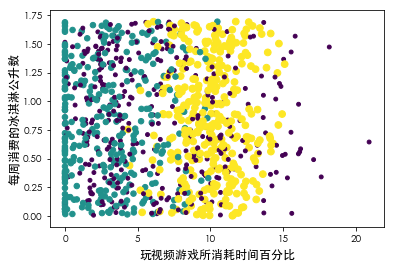

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.xlabel('玩视频游戏所消耗时间百分比',fontsize='large')
plt.ylabel('每周消费的冰淇淋公升数',fontsize='large')
# 第一个参数是x
# 第二个参数是y
# 第三个参数是每个散点的大小
# 第四个参数是每个散点的颜色（一样的值表示一样的颜色，例如[1,2,3,1]则第一个散点与第4个散点有相同颜色）
ax.scatter(return_mat[:,1], return_mat[:,2], 
           15*np.array(class_label_vector),np.array(class_label_vector))
plt.show()

上面的图是用了矩阵的列2和列3的属性（玩视频游戏所消耗时间百分比，每周消费的冰淇淋公升数）
下面的图采用矩阵的列1和列2的属性

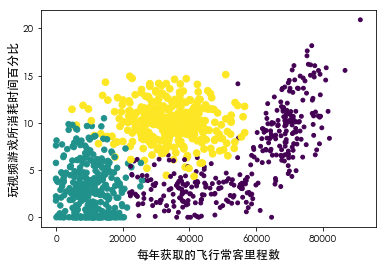

In [58]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.xlabel('每年获取的飞行常客里程数',fontsize='large')
plt.ylabel('玩视频游戏所消耗时间百分比',fontsize='large')
# 第一个参数是x
# 第二个参数是y
# 第三个参数是每个散点的大小
# 第四个参数是每个散点的颜色（一样的值表示一样的颜色，例如[1,2,3,1]则第一个散点与第4个散点有相同颜色）
ax.scatter(return_mat[:,0], return_mat[:,1], 
           15*np.array(class_label_vector),np.array(class_label_vector))
plt.show()

加上图例

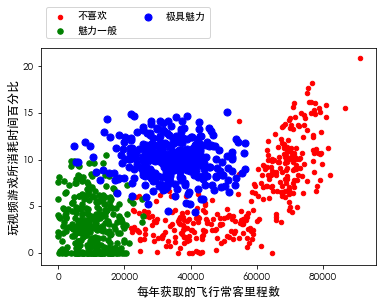

In [70]:
# 极具魅力
x3_list = []; y3_list = []
# 魅力一般
x2_list = []; y2_list = []
# 不喜欢
x1_list = []; y1_list = []

cur_index = 0
for item in class_label_vector:
    if item == 3:
        x3_list.append(return_mat[:,0][cur_index])
        y3_list.append(return_mat[:,1][cur_index])
    elif item == 2:
        x2_list.append(return_mat[:,0][cur_index])
        y2_list.append(return_mat[:,1][cur_index])
    elif item == 1:
        x1_list.append(return_mat[:,0][cur_index])
        y1_list.append(return_mat[:,1][cur_index])
    else:
        pass
    cur_index += 1
    
fig = plt.figure()
ax = fig.add_subplot(111)
plt.xlabel('每年获取的飞行常客里程数',fontsize='large')
plt.ylabel('玩视频游戏所消耗时间百分比',fontsize='large')

type1 = ax.scatter(x1_list, y1_list, s=20, c='red')
type2 = ax.scatter(x2_list, y2_list, s=30, c='green')
type3 = ax.scatter(x3_list, y3_list, s=50, c='blue')

ax.legend([type1, type2, type3], ['不喜欢', '魅力一般', '极具魅力'], 
          bbox_to_anchor=(0., 1.02, 1., .102),
          loc=3, ncol=2)
plt.show()

归一化数据（飞行里程数的差别太大，严重影响结果）  
如将取值范围处理为0到1或-1到1之间  

例如，下面公式可以将任意取值范围的特征值转化为0到1区间内的值：  
newValue = （oldValue - min）/ （max - min）

In [72]:
return_mat

array([[  4.09200000e+04,   8.32697600e+00,   9.53952000e-01],
       [  1.44880000e+04,   7.15346900e+00,   1.67390400e+00],
       [  2.60520000e+04,   1.44187100e+00,   8.05124000e-01],
       ..., 
       [  2.65750000e+04,   1.06501020e+01,   8.66627000e-01],
       [  4.81110000e+04,   9.13452800e+00,   7.28045000e-01],
       [  4.37570000e+04,   7.88260100e+00,   1.33244600e+00]])

In [73]:
# shape: (1000, 3)
# shape[0]: 1000
return_mat.shape

(1000, 3)

In [82]:
# return_mat 是一个1000行，3列的矩阵
# 取每一行的最小值return_mat.min(1)
# 取每一列的最小值return_mat.min(0)
min_vals = return_mat.min(0)
min_vals

array([ 0.      ,  0.      ,  0.001156])

In [83]:
max_vals = return_mat.max(0)
max_vals

array([  9.12730000e+04,   2.09193490e+01,   1.69551700e+00])

In [84]:
ranges = max_vals - min_vals
ranges

array([  9.12730000e+04,   2.09193490e+01,   1.69436100e+00])

In [88]:
# 1000行，3列的零矩阵
norm_data_set = np.zeros(np.shape(return_mat))
norm_data_set

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [90]:
# 1000行
m = return_mat.shape[0]

# newValue = （oldValue - min）/ （max - min）
norm_data_set = return_mat - np.tile(min_vals, (m,1))

# 这里是具体特征值相除， 而不是矩阵除法
norm_data_set = norm_data_set / np.tile(ranges, (m,1))
norm_data_set


array([[ 0.44832535,  0.39805139,  0.56233353],
       [ 0.15873259,  0.34195467,  0.98724416],
       [ 0.28542943,  0.06892523,  0.47449629],
       ..., 
       [ 0.29115949,  0.50910294,  0.51079493],
       [ 0.52711097,  0.43665451,  0.4290048 ],
       [ 0.47940793,  0.3768091 ,  0.78571804]])

In [ ]:
# 整合成一个方法
def autoNorm(data_set):
    min_vals = data_set.min(0)
    max_vals = data_set.max(0)
    ranges = max_vals - min_vals
    norm_data_set = np.zeros(np.shape(data_set))
    m = data_set.shape[0]
    norm_data_set = data_set - np.tile(min_vals, (m,1))
    norm_data_set = norm_data_set /np.tile(range, (m, 1))
    return norm_data_set, ranges, min_vals

## 4 训练算法：近邻算法没有此步骤  

## 5 测试算法

In [102]:
import operator
def classify0(inX, dataSet, labels, k):
    """
    分类器
    :param inX:         用于分类的输入向量(就是未分类但最终要分类的向量)
    :param dataSet:     输入的训练样本数据集
    :param labels:      标签向量
    :param k:           选择最近邻居的数目
    :return:
    """
    dataSetSize = dataSet.shape[0]

    # 计算两个向量点之间的欧氏距离
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet
    sqDiffMat = diffMat ** 2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances ** 0.5

    sortedDistIndicies = distances.argsort()
    classCount = {}

    # 选择距离最小的k个点，确定这些元素所在的主要分类
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1

    # 排序
    # 将classCount字典分解为元组列表，然后使用itemgetter方法，按照第二个元素的次序（？）对元组进行排序
    # 此处的排序为逆序，即按照从最大到最小次序排序，最后返回发生频率最高的元素标签
    sortedClassCount = sorted(classCount.items(),
                              key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [103]:
# 取10%的数据作为测试集
ho_ratio = 0.10

m = norm_data_set.shape[0]
num_test_vecs = int(m*ho_ratio)
error_count = 0.0

import knn_practice.knn_1 as knn_1
for i in range(num_test_vecs):
    
    classifier_result = classify0(norm_data_set[i],                   # 测试集
                    norm_data_set[num_test_vecs:m],     # 训练集数目为数据集数目 - 测试集数目
                    class_label_vector[num_test_vecs:m],    # 标签集
                    3)
    print("分类器返回的结果是：%d，而真正的答案是：%d，"
          %(classifier_result, class_label_vector[i]))
    if (classifier_result!=class_label_vector[i]):
        error_count += 1.0
print('最终错误率：%f' %(error_count/float(num_test_vecs)))

分类器返回的结果是：3，而真正的答案是：3，
分类器返回的结果是：2，而真正的答案是：2，
分类器返回的结果是：1，而真正的答案是：1，
分类器返回的结果是：1，而真正的答案是：1，
分类器返回的结果是：1，而真正的答案是：1，
分类器返回的结果是：1，而真正的答案是：1，
分类器返回的结果是：3，而真正的答案是：3，
分类器返回的结果是：3，而真正的答案是：3，
分类器返回的结果是：1，而真正的答案是：1，
分类器返回的结果是：3，而真正的答案是：3，
分类器返回的结果是：1，而真正的答案是：1，
分类器返回的结果是：1，而真正的答案是：1，
分类器返回的结果是：2，而真正的答案是：2，
分类器返回的结果是：1，而真正的答案是：1，
分类器返回的结果是：1，而真正的答案是：1，
分类器返回的结果是：1，而真正的答案是：1，
分类器返回的结果是：1，而真正的答案是：1，
分类器返回的结果是：1，而真正的答案是：1，
分类器返回的结果是：2，而真正的答案是：2，
分类器返回的结果是：3，而真正的答案是：3，
分类器返回的结果是：2，而真正的答案是：2，
分类器返回的结果是：1，而真正的答案是：1，
分类器返回的结果是：3，而真正的答案是：2，
分类器返回的结果是：3，而真正的答案是：3，
分类器返回的结果是：2，而真正的答案是：2，
分类器返回的结果是：3，而真正的答案是：3，
分类器返回的结果是：2，而真正的答案是：2，
分类器返回的结果是：3，而真正的答案是：3，
分类器返回的结果是：2，而真正的答案是：2，
分类器返回的结果是：1，而真正的答案是：1，
分类器返回的结果是：3，而真正的答案是：3，
分类器返回的结果是：1，而真正的答案是：1，
分类器返回的结果是：3，而真正的答案是：3，
分类器返回的结果是：1，而真正的答案是：1，
分类器返回的结果是：2，而真正的答案是：2，
分类器返回的结果是：1，而真正的答案是：1，
分类器返回的结果是：1，而真正的答案是：1，
分类器返回的结果是：2，而真正的答案是：2，
分类器返回的结果是：3，而真正的答案是：3，
分类器返回的结果是：3，而真正的答案是：3，
分类器返回的结果是：1，而真正的答案是：1，
分类器返回的结果是：2，而真正的答案是：2，
分类器返回的结果是：3，而真正的答案是：3，
分类器返回的结果是：3

总结：可以改变ho_ratio和变量k的值，检测错误率是否随着变量的变化而增加。依赖于分类算法、数据集和程序设置，分类器的输出结果可能有很大的不同